# Método Ford-Walford

Atividade relativa ao método de Ford-Walford

Alunos:
- Flavio Lima
- Natalia Cezaro Tyminski
- Rosângela

Professora: Lourdes Maria Werle de Almeida

## Música no Spotify

O Spotify é um serviço de streaming de música, podcast e vídeo que foi lançado oficialmente em 7 de outubro de 2008, sendo caracterizado atualmente como o serviço de streaming mais popular e usado do mundo (SPOTIFY, 2021). Novas músicas surgem e são esquecidas frequentemente no Spotify.
Para investigar o comportamento das reproduções de uma Música lançada no Spotify, dados do número de reproduções por semana nas sete primeiras semanas após o lançamento da música ‘Braba’ de Luiza Sonza, lançada em 18/03/2020, foram coletados por meio da plataforma Spotify Charts.

In [ ]:
import pandas as pd
import numpy as np

from sympy.abc import x
from sympy import limit_seq
from scipy.optimize import curve_fit

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
periodo = ['20/03/2020 a 26/03/2020',
           '27/03/2020 a 02/04/2020',
           '03/04/2020 a 09/04/2020',
           '10/04/2020 a 16/04/2020',
           '17/04/2020 a 23/04/2020',
           '24/04/2020 a 30/04/2020',
           '01/05/2020 a 07/05/2020']
semana = [1,2,3,4,5,6,7]
n_reproducoes = [2948535,7258036, 11564413, 15354624, 18785954, 22029644, 24950031]

In [ ]:
spotify_df = pd.DataFrame({'Periodo':periodo,'semana':semana,'Numero_reproducoes_acumulado':n_reproducoes})

In [ ]:
spotify_df

,Periodo,semana,Numero_reproducoes_acumulado
0,20/03/2020 a 26/03/2020,1,2948535
1,27/03/2020 a 02/04/2020,2,7258036
2,03/04/2020 a 09/04/2020,3,11564413
3,10/04/2020 a 16/04/2020,4,15354624
4,17/04/2020 a 23/04/2020,5,18785954
5,24/04/2020 a 30/04/2020,6,22029644
6,01/05/2020 a 07/05/2020,7,24950031


A partir dos dados coletados, pergunta-se:

- Qual será o número máximo de reproduções acumuladas da música ‘Braba’ no decorrer do tempo no Spotify?

- Em que semana aproximadamente esse número será alcançado?

### Matematização da situação



1.   Variáveis do problema:

  > i : intervalos de tempo (período)

  > N(i) :  Número de reproduções acumuladas no período i

2.   Uma análise preliminar dos dados

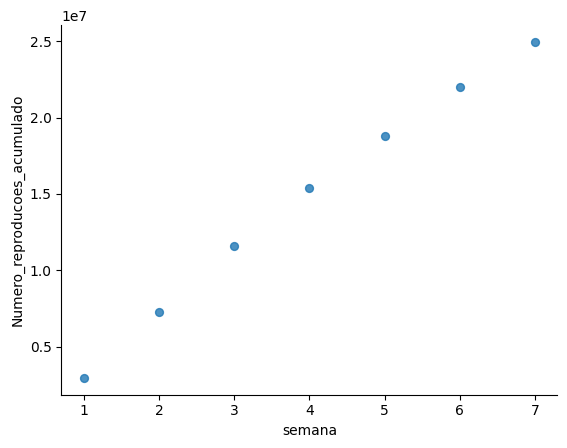

In [ ]:
spotify_df.plot(kind='scatter', x='semana', y='Numero_reproducoes_acumulado', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df = spotify_df.copy().drop(['semana'], axis = 1)
df['i'] = df.index
df.rename(columns={'Numero_reproducoes_acumulado':'N_i'}, inplace=True)
df = df[['Periodo','i','N_i']]
df

,Periodo,i,N_i
0,20/03/2020 a 26/03/2020,0,2948535
1,27/03/2020 a 02/04/2020,1,7258036
2,03/04/2020 a 09/04/2020,2,11564413
3,10/04/2020 a 16/04/2020,3,15354624
4,17/04/2020 a 23/04/2020,4,18785954
5,24/04/2020 a 30/04/2020,5,22029644
6,01/05/2020 a 07/05/2020,6,24950031


3. Hipótese

O número de reproduções acumulado de uma determinada música no Spotify ($N_{i}$) se estabiliza, isto é, existe um valor de estabilidade para o número de reproduções acumuladas.

**Teorema**: Toda sequência de números reais monótona e limitada é convergente (ELON, p.25). Logo a sequência $N_{i}$ é convergente.

Dado a sequência $N_{i}$, a existência de um ponto de estabilidade é descrita pela condição $N_{i+1} ≃ N_{i}$.

**Teorema**: Toda sequência é de Cauchy.

> **Sequência de Cauchy**



*   Condição $N_{i+1} \simeq N_{i}$

Se ($N_{i}$) é uma sequência convergente, então $N_{i}$) é de Cauchy. Deste modo, dado $ɛ > 0$, existe $i_{0}$ tal que:


*   Se $i > m > i_{0}$ então $|N_{m} - N_{i}| < ɛ$, e se $m=i+1$, segue que $|N_{i+1}-N_{i}|<ɛ$. Dessa forma, para $i$ suficientemente grande, $N_{i+1}=N^{*}$ (ponto de estabilidade).

*   Se ($N_{i}$) é convergente, então existe $N^{*}$ tal que $lim(N_{i})=N^{*}$ sendo $N^{*}$ o ponto de estabilidade.

Os dados apresentados para o número de reproduções de uma determinada música, constituem uma sequência de Cauchy.

**Premissa**: No decorrer do tempo, a taxa de crescimento do número de reproduções se torna menor. O número de reproduções de determinada música tende assintoticamente a um valor de estabilidade.

4. Obtenção do valor de estabilidade

In [ ]:
df = df[['i','N_i']]
df['N_i+1'] = [7258036, 11564413, 15354624, 18785954, 22029644, 24950031, np.NaN]
df

,i,N_i,N_i+1
0,0,2948535,7258036.0
1,1,7258036,11564413.0
2,2,11564413,15354624.0
3,3,15354624,18785954.0
4,4,18785954,22029644.0
5,5,22029644,24950031.0
6,6,24950031,NaN


Ajustando uma função linear para $f(N_{i})=N_{i+1}$

In [ ]:
def objective(x, a, b):
 return a*x + b

Desconsiderando as duas primeiras linhas

In [ ]:
x = df.iloc[2:-1,1].values
y = df.iloc[2:-1,2].values

In [ ]:
# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = 0.91966 * x + 4706804.52569


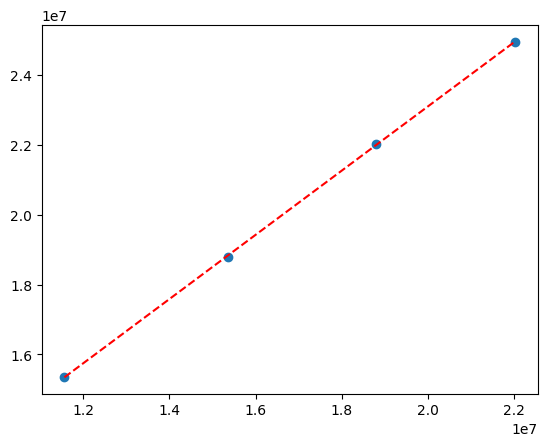

In [ ]:
plt.scatter(x, y)
x_line = np.arange(min(x), max(x), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')
plt.show()

**Ponto de Estabilidade**

$N_{i+1} ≃ N_{i} ≃ N^{*}$

$lim f(N_{i}) = lim (N_{i+1}) = lim (N_{i}) = N^{*}$

$f: y = x$

$g: y = 0.91966x + 4706804.52569$

$x = 0.91966x + 4706804.52569$

$x ≃ 58586100$

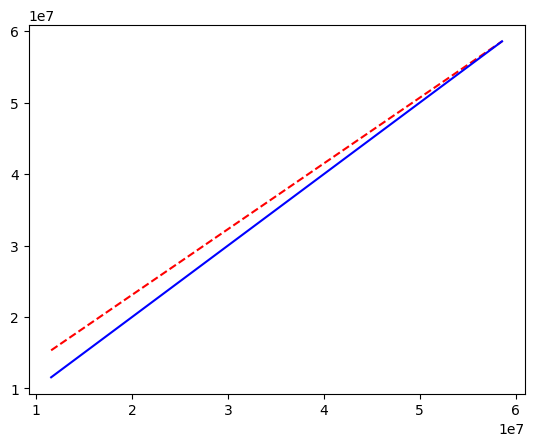

In [ ]:
pt_estabilidade = 58586100
x_line = np.arange(11564413, pt_estabilidade, 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')
plt.plot(x_line, x_line, color='blue')
plt.show()

**Diferença entre o número de reproduções e o ponto de estabilidade**

In [ ]:
diff_df = df[['i','N_i']]
diff_df['diff'] = pt_estabilidade - df['N_i']
diff_df = diff_df.drop('N_i', axis=1)
diff_df

,i,diff
0,0,55637565
1,1,51328064
2,2,47021687
3,3,43231476
4,4,39800146
5,5,36556456
6,6,33636069


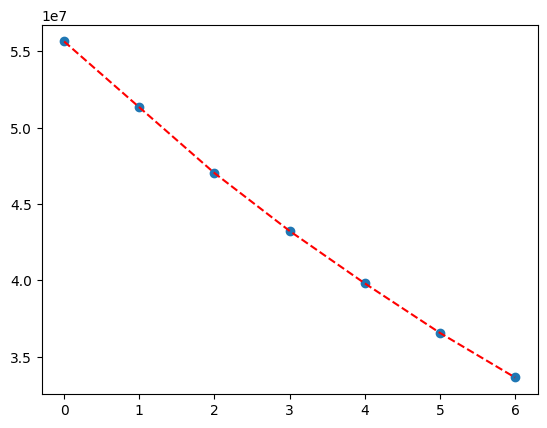

In [ ]:
plt.scatter(diff_df['i'], diff_df['diff'])
plt.plot(diff_df['i'], diff_df['diff'], '--', color='red')
plt.show()

## VALIDAÇÃO DO MODELO
COMPARAÇÃO  DOS DADOS OBTIDOS PELO MODELO COM OS DADOS OBSERVADOS

In [ ]:
periodo = ['20/03/2020 a 26/03/2020',
           '27/03/2020 a 02/04/2020',
           '03/04/2020 a 09/04/2020',
           '10/04/2020 a 16/04/2020',
           '17/04/2020 a 23/04/2020',
           '24/04/2020 a 30/04/2020',
           '01/05/2020 a 07/05/2020']
semana = [1,2,3,4,5,6,7]
n_reproducoes = [2948535,7258036, 11564413, 15354624, 18785954, 22029644, 24950031]

In [ ]:
n_previsto = [0.91966*i+4706804.52569 for i in n_reproducoes]

In [ ]:
spotify_df = pd.DataFrame({'Periodo':periodo,'semana':semana,'Numero_reproducoes_acumulado':n_reproducoes,'Numero_reproducoes_acumulado_previsto':np.round(n_previsto,1)})

In [ ]:
spotify_df

,Periodo,semana,Numero_reproducoes_acumulado,Numero_reproducoes_acumulado_previsto
0,20/03/2020 a 26/03/2020,1,2948535,7418454.2
1,27/03/2020 a 02/04/2020,2,7258036,11381729.9
2,03/04/2020 a 09/04/2020,3,11564413,15342132.6
3,10/04/2020 a 16/04/2020,4,15354624,18827838.0
4,17/04/2020 a 23/04/2020,5,18785954,21983495.0
5,24/04/2020 a 30/04/2020,6,22029644,24966586.9
6,01/05/2020 a 07/05/2020,7,24950031,27652350.0


### Modelo que determina o número de reproduções em função da semana

In [ ]:
diff_df

,i,diff
0,0,55637565
1,1,51328064
2,2,47021687
3,3,43231476
4,4,39800146
5,5,36556456
6,6,33636069


Ajustando uma função exponencial $y=ae^{bx}$

In [ ]:
def objective_2(x, a, b):
 return a * np.exp(b * x)

Desconsiderando a primeira linha

In [ ]:
x = diff_df.iloc[:,0].values
y = diff_df.iloc[:,1].values

In [ ]:
# curve fit
popt, _ = curve_fit(objective_2, x, y)
# summarize the parameter values
a, b = popt

In [ ]:
print(a,b)

55694603.50292572 -0.0841229340866406


$y=55694603.5e^{-0.0841x}$

In [ ]:
y_previsto = [55694603.5*np.exp(-0.0841 * i) for i in semana]

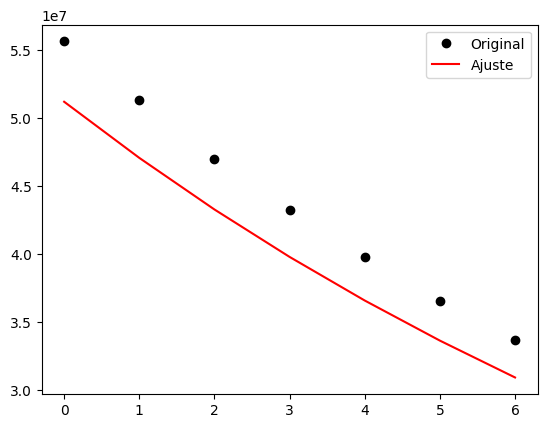

In [ ]:
plt.figure()
plt.plot(x, y, 'ko', label="Original")
plt.plot(x, y_previsto, 'r-', label="Ajuste")
plt.legend()
plt.show()

**Modelo Matemático**

- Substituindo o Ponto de Estabilidade

$N^{*} = 58586100$

$y=55694603.5e^{-0.0841i}$

$(N^{*}-N)(i)=55694603.5e^{-0.0841i}$

$58586100-N(i)=55694603.5e^{-0.0841i}$

$N(i)=58586100 - 55694603.5e^{-0.0841i}$

In [ ]:
y = 58586100

In [ ]:
print(np.round(np.log(y)/(-0.0841 *np.log(55694603.5))))

-12.0


O ponto de estabilidade será atingido na semana 12